 
<h1 style="text-align: center;"><span style="color: #333399;">Descriptive Text Analytics using Text Preprocessing/Word Frequency/Word Cloud. </span></h1>
<h6 style="text-align: center;">Created by: Michael Gagliano on 9/3/2018</h6>
<h6 style="text-align: center;">"K-State Honor Code "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.</h6>

<h1><span style="color: #333399;">Index:</span></h1>
    
<p><i>I will be pulling data from the provided files - auto.csv and finance.csv - from Dr. Chae's MIS670 course. This data comes from various HTML auto blogs. Using these files I will do some basic exploratory analysis using the techniques being asked, and answer the questions provided.</i></p>
<ol>
	<li>Null Hypotheses</li>
	<li>Data Preprocessing for Content Analysis
<ol>
	<li>Importing the necessary packages/modules
<ul>
	<li><em>nltk, re, csv, numpy, wordcloud, pandas, matplotlib</em></li>
</ul>
</li>
	<li>Cleaning the text data
<ol>
	<li>Tokenization, Transforming Case, Stopwords, Lemmatization, Ngrams
<ol>
	<li>Auto Data</li>
	<li>Finance Data</li>
</ol>
</li>
</ol>
</li>
</ol>
</li>
	<li>Analysis
<ol>
	<li>Word Frequency</li>
	<li>Bi-grams</li>
	<li>Plotting</li>
</ol>
</li>
	<li>Word Cloud Visualization</li>
	<li>Summary + Questions Answered</li>
	<li>Appendix</li>
</ol>

# 1. Null Hypotheses:

<b>Question: Does the data focus more on brands or the new technology in the auto industry (i.e. electric cars, hybrids, etc.)?</b>
    <li>Null Hypothesis 1: There will be no significant difference in frequency in mentioning of auto brands relative to the discussion of automobile technology current topics</li>
<b>Question: Does a certain company get named more often in the data set than others?</b>
    <li>Null Hypothesis 2: There is no siginficant difference between the relative frequency of a company being mentioned more than another in the data.</li>


# 2. Data Pre-Processing for Content Analysis

<p>Let's first understand our approach for this specific Content Analysis exercise:</p>
<p>We need to first pre-process our text data. <span style="text-decoration: underline;"><em>Pre-processing</em></span>, in its most condensed form, is taking the collected data and manipulating it in a way you can begin to analyze it and give it meaning within our Python IDE.</p>
<p>In this instance imagine we have a giant block of ice with hundreds of different fish frozen inside. Pre-processing <em>lets us break the giant block of ice open</em> so we can start to look at the individual parts of the sum - rather than just looking at one large object.</p>
<p>Within pre-processing, we use a technique called <span style="text-decoration: underline;"><em>tokenization</em></span>. Tokenization allows us to break up blocks of data into their individual components, like paragraphs in a novel, or words in a sentence. Think of this as deciding how we want to organize the different fish inside of the ice to make it easiest to understand later. A method commonly used in tokenization is <em><span style="text-decoration: underline;">.lower()</span></em>. This modifies all of the newly created tokens to have uniform lowercase status. This prevents us from having to differentiate between capitilized words and acronyms.</p>
<p>However, there's a lot of junk floating around in the ocean too. We want to make sure we only have the content relevant to what we are trying to analyze. If we don't remove and clean the objects that are not relevant to the data - such as certain words that don't provide insight into our investigation - the signal in the data will be lost from all of the noise. So if we don't get rid off all the trash in the ice too - we won't have a good idea of what the fish in the ice represent.</p>
<p>Incorporating <em><span style="text-decoration: underline;">'stopwords'</span></em> is one method we can do just that - filtering out words that don't provide meaningful context to the overall story of the data. We can use a built in lexicon of words, and/or we can add our own specific set to further target the data signal. <em><span style="text-decoration: underline;">'lemmatization/stemming'</span></em> allows us to account for variations of a word/root so we don't need to manually account for things like plurals or contractions, and ultimately further refine the signal data.</p>

### Importing the necessary packages:

In [1]:
# import nltk (natural language tool kit), a popular python package for text mining
import nltk
# stopwords, FreqDist, word_tokenize to perform more targeted functions and analysis
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#regular expression will help us improve the accuracy of our mining parameters
import re
#csv will be used to import, read, and save the data 
import csv
#Pandas lets us visualize and manipulate the data in easy-to-visualize ways
import pandas as pd
#Matplotlib.pyplot allows us to create visual graphs to better tell the story of our data and findings
import matplotlib.pyplot as plt
% matplotlib inline

### Reading the data provided:

In [2]:
#Auto Data

review_auto = [] #We assign a variable to an empty list to hold the collected data
openfile = open('data/auto.csv', 'rt')
r = csv.reader(openfile)
for row in r:
    review_auto.append(row)
openfile.close()

# Finance Data

review_finance = [] #We assign a variable to an empty list to hold the collected data
openfile2 = open('data/finance.csv', 'rt')
r2 = csv.reader(openfile2)
for row in r2:
    review_finance.append(row)
openfile2.close()

#We can confirm that the iterated data was stored properly in the list by executing the print(review_auto) command 

### Pre-processing of Auto Data:

In [3]:
#We stored the data as a list to begin with. Let's assign a variable to the data as we convert it into the string dtype.
tokens = str(review_auto)

#Conversion of words to lowercase is important. Text Analytics is case sensitive, so it is best to keep it uniform.
tokens = tokens.lower()

#We want to eliminate all white space and symbols from the text as well so we can break the data into individual words 
#Here we use the regular expression re.sub() function to replace (in this case remove) any found instances in the data
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)

#We can now break up the data into individual tokens rather than a large singular chunk
tokens = word_tokenize(tokens)
tokens

#Remove Stopwords from the data using the English Stopwords dictionary
tokens = (word for word in tokens if word not in stopwords.words('english'))
#Get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
#Remove the non-Alphanumeric tokens from the dataset now
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)

### Word Frequency Analysis of Auto Data

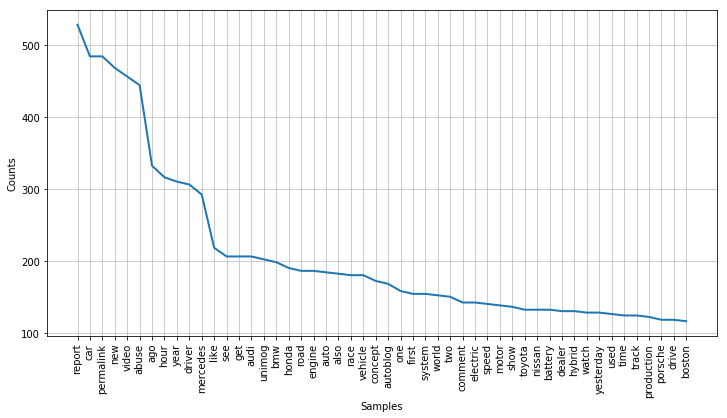

In [4]:
fdist = nltk.FreqDist(tokens)
plt.figure(figsize=(12,6))
fdist.plot(50)

<b>We notice that words such as 'report', 'permalink', 'also', 'unimog', 'see', 'get', 'like', 'ago', 'hour', 'year', etc. are also high in frequency but create irrelevant noise to obscure the signal of the data. Let's remove those now, too.</b>
<p>Jupyter Notebook's memory would not let me assign and execute the merged stopwords library independent of the entire tokenization process below. I have not confirmed the exact cause or reason of this yet.</p>

In [5]:
tokens2 = str(review_auto)
tokens2 = tokens2.lower()
tokens2 = re.sub("[^a-zA-Z0-9]", " ", tokens2)
tokens2 = word_tokenize(tokens2)
tokens2 = (word for word in tokens2 if word not in stopwords.words('english'))

wordnet_lemmatizer = WordNetLemmatizer()
tokens2 = (wordnet_lemmatizer.lemmatize(word) for word in tokens2)

#Additional stopwords revision
engage_stopwords = set(('report', 'permalink', 'also', 'unimog', 'see', 'get', 'like', 'ago',
                          'hour', 'year', 'one', 'abuse', 'comment', 'car', 'new', 'video', 'driver','reply',
                        'update', 'autoblog', 'since'))
extra_stoplist = set(stopwords.words('english')) | engage_stopwords
tokens2 = (word for word in tokens2 if word not in extra_stoplist)

tokens2 = (word for word in tokens2 if word.isalpha())
tokens2 = (word for word in tokens2 if len(word) >= 3)


In [6]:
fdist2 = nltk.FreqDist(tokens2)

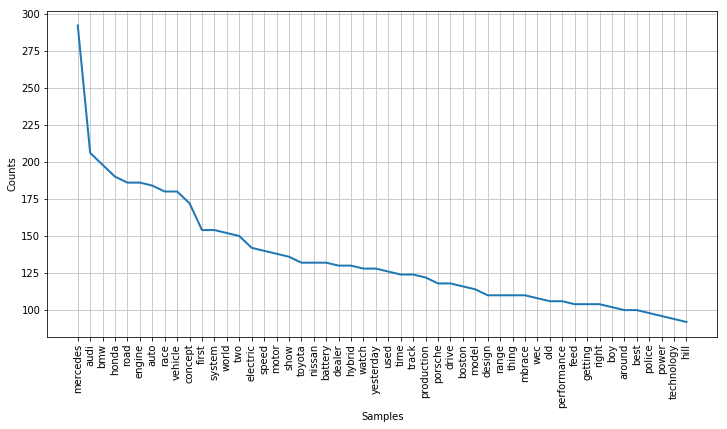

In [7]:
plt.figure(figsize=(12,6))
fdist2.plot(50)

### Top 20 Most Frequent Words in Auto Data

In [8]:
c = fdist2.most_common(20)
c

[('mercedes', 292),
 ('audi', 206),
 ('bmw', 198),
 ('honda', 190),
 ('road', 186),
 ('engine', 186),
 ('auto', 184),
 ('race', 180),
 ('vehicle', 180),
 ('concept', 172),
 ('first', 154),
 ('system', 154),
 ('world', 152),
 ('two', 150),
 ('electric', 142),
 ('speed', 140),
 ('motor', 138),
 ('show', 136),
 ('toyota', 132),
 ('nissan', 132)]

### Assessing bi-grams (pairs of adjacent words) also can provide a better picture of the data's context.

In more extensive applications, N-grams are useful in machine learning programs such as computational linguistics and speech recognition.

In [9]:
tokens2 = str(review_auto)
tokens2 = tokens2.lower()
tokens2 = re.sub("[^a-zA-Z0-9]", " ", tokens2)
tokens2 = word_tokenize(tokens2)
tokens2 = (word for word in tokens2 if word not in stopwords.words('english'))

wordnet_lemmatizer = WordNetLemmatizer()
tokens2 = (wordnet_lemmatizer.lemmatize(word) for word in tokens2)

#Additional stopwords revision
engage_stopwords = set(('report', 'permalink', 'also', 'unimog', 'see', 'get', 'like', 'ago',
                          'hour', 'year', 'one', 'abuse', 'comment', 'car', 'new', 'video', 'driver','reply',
                        'update', 'autoblog', 'since'))
extra_stoplist = set(stopwords.words('english')) | engage_stopwords
tokens2 = (word for word in tokens2 if word not in extra_stoplist)

tokens2 = (word for word in tokens2 if word.isalpha())
tokens2 = (word for word in tokens2 if len(word) >= 3)
#Create your bigrams ... a bigram are a pair of two tokens
bigrams = nltk.bigrams(tokens2)
#compute frequency distribution for all the bigrams in the text
fdist_bi = nltk.FreqDist(bigrams)
fdist_bi

FreqDist({('mercedes', 'mbrace'): 88, ('mercedes', 'benz'): 88, ('roll', 'royce'): 80, ('royce', 'ghost'): 80, ('ghost', 'getting'): 80, ('getting', 'nip'): 80, ('nip', 'tuck'): 80, ('nissan', 'pathfinder'): 72, ('tron', 'quattro'): 64, ('beverly', 'hill'): 62, ...})

In [10]:
# save the results of word frequency
output_auto = open("data/output_fdist__auto_bigram.csv", "w") 
w = csv.writer(output_auto)
w.writerows(fdist_bi.items())
output_auto.close()

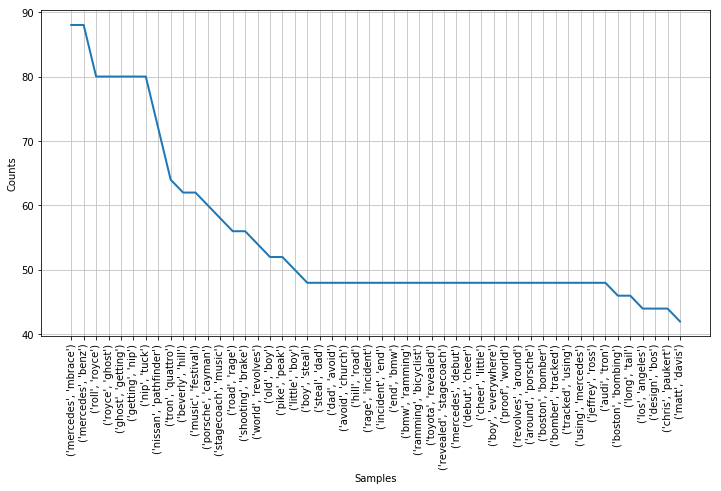

In [11]:
# plot word frequency using bigram
plt.figure(figsize=(12,6))
fdist_bi.plot(50)

### Top 20 Most Frequent Bi-Grams in Auto Data

In [12]:
fdist_bi.most_common(20)

[(('mercedes', 'mbrace'), 88),
 (('mercedes', 'benz'), 88),
 (('roll', 'royce'), 80),
 (('royce', 'ghost'), 80),
 (('ghost', 'getting'), 80),
 (('getting', 'nip'), 80),
 (('nip', 'tuck'), 80),
 (('nissan', 'pathfinder'), 72),
 (('tron', 'quattro'), 64),
 (('beverly', 'hill'), 62),
 (('music', 'festival'), 62),
 (('porsche', 'cayman'), 60),
 (('stagecoach', 'music'), 58),
 (('road', 'rage'), 56),
 (('shooting', 'brake'), 56),
 (('world', 'revolves'), 54),
 (('old', 'boy'), 52),
 (('pike', 'peak'), 52),
 (('little', 'boy'), 50),
 (('boy', 'steal'), 48)]

# Finance Data Pre-Processing
<i>For the purpose of condensing the file, I will be cleaning Stopwords and including bigrams altogether similar to how the Auto data was cleaning earlier.</i>

In [13]:
tokens_f = str(review_finance)
tokens_f = tokens_f.lower()
tokens_f = re.sub("[^a-zA-Z0-9]", " ", tokens_f)
tokens_f = word_tokenize(tokens_f)

#Remove Stopwords from the data using the English Stopwords dictionary
#Additional stopwords revision
new_stopwords = set(['report', 'permalink', 'also', 'inc', 'see', 'get', 'like', 'ago',
                          'hour', 'year', 'one', 'abuse', 'comment', 'new', 'video','reply',
                        'update', 'blog', 'since', 'still', 'thing', 'first' ])
extra_stoplist2 = set(stopwords.words('english')) | new_stopwords
tokens_f = (word for word in tokens_f if word not in extra_stoplist2)


wordnet_lemmatizer = WordNetLemmatizer()
tokens_f = (wordnet_lemmatizer.lemmatize(word) for word in tokens_f)
tokens_f = (word for word in tokens_f if word.isalpha())
tokens_f = (word for word in tokens_f if len(word) >= 3)

### Word Frequency Analysis of Finance Data

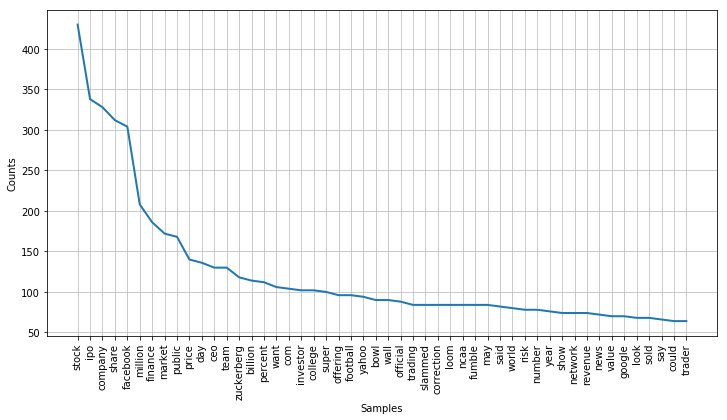

In [14]:
fdist_f = nltk.FreqDist(tokens_f)
plt.figure(figsize=(12,6))
fdist_f.plot(50)

### Top 20 Most Frequent Words in Finance Data

In [15]:
d = fdist_f.most_common(25)
d

[('stock', 430),
 ('ipo', 338),
 ('company', 328),
 ('share', 312),
 ('facebook', 304),
 ('million', 208),
 ('finance', 186),
 ('market', 172),
 ('public', 168),
 ('price', 140),
 ('day', 136),
 ('ceo', 130),
 ('team', 130),
 ('zuckerberg', 118),
 ('billion', 114),
 ('percent', 112),
 ('want', 106),
 ('com', 104),
 ('investor', 102),
 ('college', 102),
 ('super', 100),
 ('offering', 96),
 ('football', 96),
 ('yahoo', 94),
 ('bowl', 90)]

### Bi-Grams
Bi-grams for the Finance File can be interesting, due to the potential duel-context of words. e.g. Stock Shares vs. Share Video, etc

In [16]:
#We stored the data as a list to begin with. Let's assign a variable to the data as we convert it into the string dtype.
tokens_f = str(review_finance)

#Conversion of words to lowercase is important. Text Analytics is case sensitive, so it is best to keep it uniform.
tokens_f = tokens_f.lower()

#We want to eliminate all white space and symbols from the text as well so we can break the data into individual words 
#Here we use the regular expression re.sub() function to replace (in this case remove) any found instances in the data
tokens_f = re.sub("[^a-zA-Z0-9]", " ", tokens_f)

#We can now break up the data into individual tokens rather than a large singular chunk
tokens_f = word_tokenize(tokens_f)

#Remove Stopwords from the data using the English Stopwords dictionary
#Additional stopwords revision
new_stopwords = set(['report', 'permalink', 'also', 'inc', 'see', 'get', 'like', 'ago',
                          'hour', 'year', 'one', 'abuse', 'comment', 'new', 'video','reply',
                        'update', 'blog', 'since', 'still', 'thing', 'com', 'yahoo', 'http'])
extra_stoplist2 = set(stopwords.words('english')) | new_stopwords
tokens_f = (word for word in tokens_f if word not in extra_stoplist2)

#Get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
tokens_f = (wordnet_lemmatizer.lemmatize(word) for word in tokens_f)
#Remove the non-Alphanumeric tokens from the dataset now
tokens_f = (word for word in tokens_f if word.isalpha())
#remove short words
tokens_f = (word for word in tokens_f if len(word) >= 3)
#Create your bigrams ... a bigram are a pair of two tokens
bigrams2 = nltk.bigrams(tokens_f)
#compute frequency distribution for all the bigrams in the text
fdist_bi2 = nltk.FreqDist(bigrams2)
fdist_bi2

FreqDist({('college', 'football'): 96, ('super', 'bowl'): 90, ('stock', 'slammed'): 84, ('slammed', 'official'): 84, ('official', 'correction'): 84, ('correction', 'loom'): 84, ('ncaa', 'fumble'): 84, ('fumble', 'college'): 84, ('football', 'team'): 84, ('team', 'want'): 84, ...})

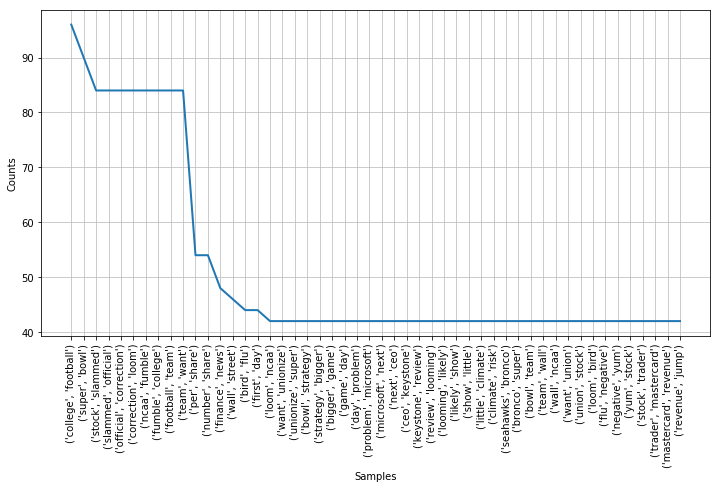

In [17]:
plt.figure(figsize=(12,6))
fdist_bi2.plot(50)

### Top 20 Most Frequent Words in Finance Data

In [18]:
fdist_bi2.most_common(20)

[(('college', 'football'), 96),
 (('super', 'bowl'), 90),
 (('stock', 'slammed'), 84),
 (('slammed', 'official'), 84),
 (('official', 'correction'), 84),
 (('correction', 'loom'), 84),
 (('ncaa', 'fumble'), 84),
 (('fumble', 'college'), 84),
 (('football', 'team'), 84),
 (('team', 'want'), 84),
 (('per', 'share'), 54),
 (('number', 'share'), 54),
 (('finance', 'news'), 48),
 (('wall', 'street'), 46),
 (('bird', 'flu'), 44),
 (('first', 'day'), 44),
 (('loom', 'ncaa'), 42),
 (('want', 'unionize'), 42),
 (('unionize', 'super'), 42),
 (('bowl', 'strategy'), 42)]

# Word Cloud Visualization
I had difficulty with Jupyter Notebook effectively cleaning the additional stopwords. I had to create a separate line for each word which I was unable to determine why, unless it has to do with something regarding the memory/function of stopwords.

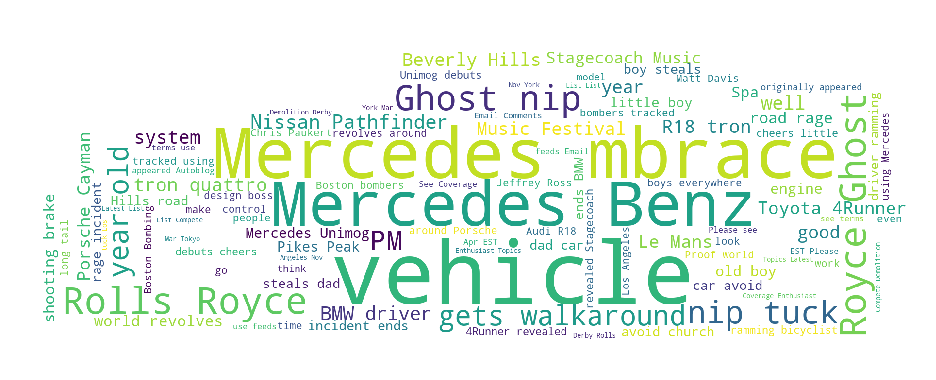

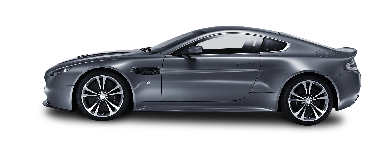

In [19]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt

d = path.dirname("data/")

# Read the whole text.
text = open(path.join(d, 'auto.txt')).read()

# read the mask image
# taken from
# http://www.pngpix.com/download/grey-aston-martin-v12-vantage-luxury-car-png-image
auto_mask = np.array(Image.open(path.join(d, "aston.png")))

stopwords = set(STOPWORDS)
stopwords.add(('report'))
stopwords.add(('permalink'))
stopwords.add(('abuse'))
stopwords.add(('reply'))
stopwords.add(('comment'))
stopwords.add(('inc'))
stopwords.add(('video'))
stopwords.add(('hour'))
stopwords.add(('update'))
stopwords.add(('new'))
stopwords.add(('like'))
stopwords.add(('hours'))
stopwords.add(('ago'))
stopwords.add(('now'))
stopwords.add(('will'))
stopwords.add(('getting'))
stopwords.add(('yesterday'))
stopwords.add(('one'))

wc = WordCloud(background_color="white", max_words=100, mask=auto_mask,
               stopwords=stopwords)

# generate word cloud
wc.generate(text)

# show
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis("off")

plt.figure()
plt.imshow(auto_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.savefig("data/auto.png")
plt.savefig("data/auto.pdf")

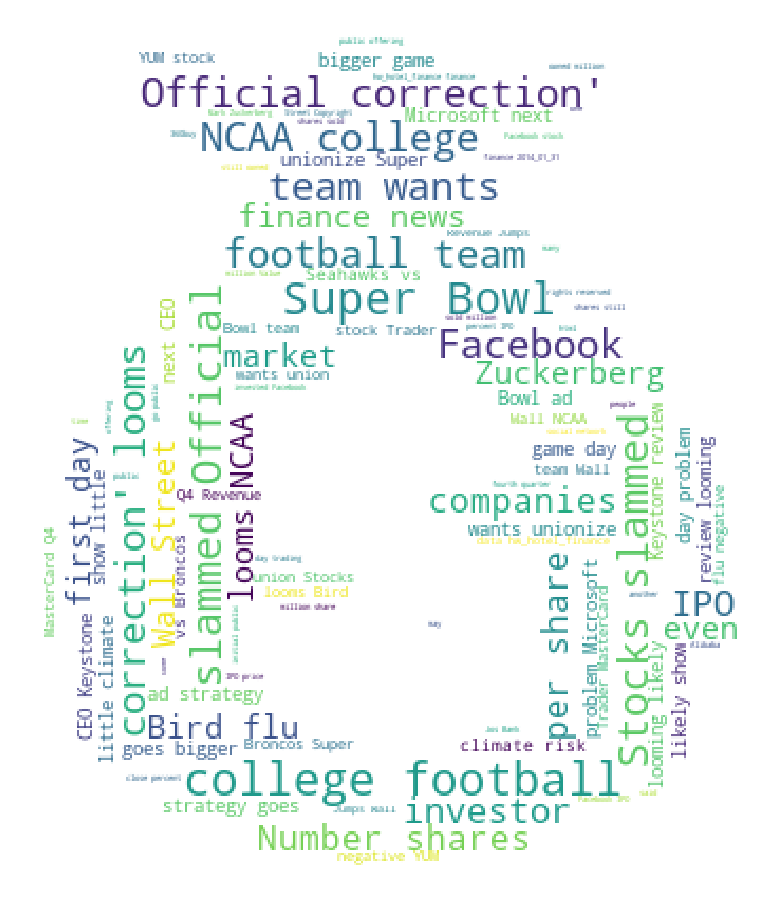

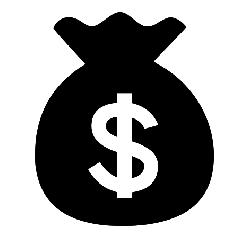

In [20]:
d = path.dirname("data/")

# Read the whole text.
text2 = open(path.join(d, 'finance.txt')).read()

# read the mask image
# taken from
# http://www.pngpix.com/download/grey-aston-martin-v12-vantage-luxury-car-png-image
finance_mask = np.array(Image.open(path.join(d, "fin2.png")))

stopwords2 = set(STOPWORDS)
stopwords2.add(('report'))
stopwords2.add(('yahoo'))
stopwords2.add(('abuse'))
stopwords2.add(('reply'))
stopwords2.add(('comment'))
stopwords2.add(('inc'))
stopwords2.add(('video'))
stopwords2.add(('hour'))
stopwords2.add(('update'))
stopwords2.add(('new'))
stopwords2.add(('like'))
stopwords2.add(('hours'))
stopwords2.add(('ago'))
stopwords2.add(('now'))
stopwords2.add(('will'))
stopwords2.add(('company'))
stopwords2.add(('yesterday'))
stopwords2.add(('fumbles'))

wc2 = WordCloud(background_color="white", max_words=100, mask=finance_mask,
               stopwords=stopwords2)

# generate word cloud
wc2.generate(text2)

# show
plt.figure(figsize=(16,16))
plt.imshow(wc2)
plt.axis("off")

plt.figure()
plt.imshow(finance_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.savefig("data/finance.png")
plt.savefig("data/finance.pdf")

# Summary and Questions Answered:

### <span style="color: #ff0000;">Null Hypothesis 1 was refuted, as there was a clear indication from the data that Mercedes was focused on far more heavily than other brands or content within the data.</span>

### <span style="color: #ff0000;">Null Hypothesis 2 was partially refuted, as Facebook seemed to appear more often than any other individual company in the most common words. However, the bigrams indicate a completely different story more related to football. I am unsure if this was due to poor stopword filtering or football-related financial content deep within data.</span>

<br><b>• What are popular words in auto blog articles?</b></br>
<br> Mercedes, Audi, BMW, Honda, and Road were the top 5 words. The articles seemed to focus on the brand names and the performance technology's capabilities from the bigrams.</br>
<br><b>• What are popular words in finance news? </b></br>
<br> Stock, IPO, Company, Share,  were the top 5 words. The articles seemed to focus significantly around words with facebook and their finances.</br>
<br><b>• Are there any differences between auto blog and finance news in terms of word frequency? </b></br>
<br>Yes - the words from the auto blogs are focused around auto-industry terminology and the finance news is focused primarily around stocks of technology companies</br>
<br><b>• Are there some similarities between those reviews? </b></br>
<br>The plot of the word frequency distribution and bigram distrubition of each dataset seems to tell a different story than if you just did analysis with one of them, rather than both. They both have very high peaks with around 20 words and then drastically drop off in frequency.</br> 
<br><b>• Are there unexpected findings? </b></br>
<br>Yes - for the finance dataset many football-related terms appear when a bigram analysis is done. However the word frequency distribution has a significantly higher amount of the words Stock, IPO, Facebook, etc. I am unsure if the article had advertisements related to football teams/events or there was discussion about player salaries, trades, and values.</br>
<br><b>• What are popular bi-grams from each dataset?</b> </br>
<br>See above data and answers</br>

# Appendix: Creating Pre-Processing Function
Creating a function would reduce memory, increase portability, and become more efficient to manipulate going forward

In [21]:
break

def text_proc(x):
    
    tokens_f = str(x)
    tokens_f = tokens_f.lower()
    tokens_f = re.sub("[^a-zA-Z0-9]", " ", tokens_f)
    tokens_f = word_tokenize(tokens_f)

    #Remove Stopwords from the data using the English Stopwords dictionary
    #Additional stopwords revision
    new_stopwords = set(['report', 'permalink', 'also', 'inc', 'see', 'get', 'like', 'ago',
                              'hour', 'year', 'one', 'abuse', 'comment', 'new', 'video','reply',
                            'update', 'blog', 'since', 'still', 'thing' ])
    extra_stoplist2 = set(stopwords.words('english')) | new_stopwords
    tokens_f = (word for word in tokens_f if word not in extra_stoplist2)

    #Get stemming words or lemmas
    wordnet_lemmatizer = WordNetLemmatizer()
    tokens_f = (wordnet_lemmatizer.lemmatize(word) for word in tokens_f)
    #Remove the non-Alphanumeric tokens from the dataset now
    tokens_f = (word for word in tokens_f if word.isalpha())
    #remove short words
    tokens_f = (word for word in tokens_f if len(word) >= 3)
    return tokens_f
text_proc(review_finance)

SyntaxError: 'break' outside loop (<ipython-input-21-a2ce67a657cf>, line 1)